In [2]:
import pandas as pd
from string import punctuation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
pd.set_option("display.max_colwidth", 250)
warnings.filterwarnings("ignore")

2022-01-03 14:03:58.319816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-03 14:03:58.319896: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
table = str.maketrans("", "", punctuation)


#### Preprocessing the data
- Remove Punctuation
- Lower All the sentences
- Remove Punctuations


In [4]:
data  = pd.read_csv("./summary.csv")

In [5]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [6]:
def preprocess(input_list, table=table) :
    output_list = []
    for row in input_list:
        row_list = ""
        for contract_k, contract_v in contraction_mapping.items():
            row.replace(contract_k, contract_v)
        for word in row.split():
            # if word not in stop_words:
            word = word.translate(table)
            row_list += word.lower() + " "
        output_list.append(row_list.strip())
        
    return np.array(output_list)

In [7]:
headlines = preprocess(data.headlines.to_list())
text = preprocess(data.text.to_list())

data.headlines = headlines
data.text = text
data.headlines = data.headlines.apply(lambda x: "_START " + x + " _END")

In [8]:
for i in range(5):
    print("Review:",data['text'][i])
    print("Summary:",data['headlines'][i])
    print("\n")

Review: saurav kant an alumnus of upgrad and iiitbs pg program in machine learning and artificial intelligence was a sr systems engineer at infosys with almost 5 years of work experience the program and upgrads 360degree career support helped him transition to a data scientist at tech mahindra with 90 salary hike upgrads online power learning has powered 3 lakh careers
Summary: _START upgrad learner switches to career in ml  al with 90 salary hike _END


Review: kunal shahs credit card bill payment platform cred gave users a chance to win free food from swiggy for one year pranav kaushik a delhi techie bagged this reward after spending 2000 cred coins users get one cred coin per rupee of bill paid which can be used to avail rewards from brands like ixigo bookmyshow ubereats cultfit and more
Summary: _START delhi techie wins free food from swiggy for one year on cred _END


Review: new zealand defeated india by 8 wickets in the fourth odi at hamilton on thursday to win their first match

In [9]:
del headlines
del text

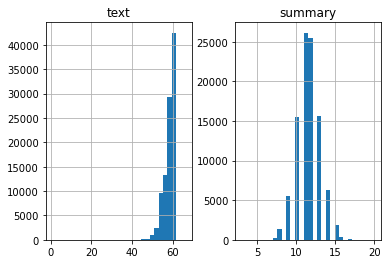

In [10]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['text']:
      text_word_count.append(len(i.split()))

for i in data['headlines']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [11]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [12]:
def tokenizer(tok_object, x):
    all_ = x
    tk = tok_object
    tk.fit_on_texts(all_)
    return tk

x_tok = tokenizer(Tokenizer(), train.text.to_list())
y_tok = tokenizer(Tokenizer(), train.headlines.to_list())

In [13]:
# TOkenize the train data
def tokenize(input_, pad_x_size:int = 70, pad_y_size:int = 20, x_tok=x_tok, y_tok=y_tok):
    
    y = input_.headlines.to_numpy()
    x = input_.text.to_numpy()
    
    headlines = y_tok.texts_to_sequences(np.array(y))
    text = x_tok.texts_to_sequences(np.array(x))
    
    headlines = pad_sequences(headlines, padding="post", maxlen=pad_y_size)
    text = pad_sequences(text, padding="post", maxlen=pad_x_size)
    
    return headlines, text

In [14]:
headlines_train, text_train = tokenize(train)
headlines_test, text_test = tokenize(test)

In [15]:
assert len(headlines_test) == len(text_test)
assert len(headlines_train) == len(text_train)

#### Build The model and train the dataset

In [16]:
y_voc_size  =   len(y_tok.word_index) +1
x_voc_size  =   len(x_tok.word_index) +1

### Build the model

In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ( Embedding, LSTM, RepeatVector, TimeDistributed, 
                                    Dense, Input, Bidirectional, Concatenate)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from attention import AttentionLayer
from tensorflow.keras.utils import plot_model

In [20]:
dim = 256
def seq2seq_model(dim= dim):
    ## Encoder With Lstm
    inputs = Input(shape=(None,x_voc_size))
    embedding = Embedding(x_voc_size, dim, trainable=True)(inputs)
    #LSTM1
    lstm1 = LSTM(dim, return_sequences=True, return_state=True)
    encoder_output1, state_h1, state_c1 = lstm1(embedding)
    # LSTM2
    lstm2 = LSTM(dim, return_sequences=True, return_state=True)
    encoder_output2, state_h2, state_c2 = lstm1(encoder_output1)
    # LSTM3
    lstm3 = LSTM(dim, return_sequences=True, return_state=True)
    encoder_outputs, state_h, state_c = lstm3(encoder_output2)
    encoder_states = [state_h, state_c]
    # Decoder Inputs
    inputs_decoder = Input( shape=(None,y_voc_size))
    decoder_embedding_layer = Embedding(x_voc_size, dim, trainable=True)
    decoder_outputs_embedding = decoder_embedding_layer(inputs_decoder)
    # LSTM Decoder
    decoder_lstm = LSTM( dim, return_sequences=True, return_state=True)
    decoder_outputs, decoder_fwd_state, decoder_bwd_state = decoder_lstm(
        decoder_outputs_embedding, initial_state=encoder_states)
    #Attention, layer, 
    attn_layer = AttentionLayer(name='attention_layer') 
    attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
    # Concatenate the layers
    decoder_concat_input = Concatenate(axis=-1, name="concat_layer")([decoder_outputs, attn_out])
    # Dense Output layer
    dense_decoder = TimeDistributed(Dense(y_voc_size, activation="softmax"))
    decoder_outputs = dense_decoder(decoder_concat_input)

    model = Model([inputs, inputs_decoder], decoder_outputs)
    model.summary()



    ##### Define the Inference Model NOw:

    encoder_inference = Model(inputs, encoder_states)
    decoder_inputs_state_h = Input(shape=(x_voc_size,))
    decoder_inputs_state_c = Input(shape=(x_voc_size,))
    decoder_states = [decoder_inputs_state_h, decoder_inputs_state_c]
    decoder_outputs, decoder_outputs_h, decoder_outputs_state_c = decoder_lstm(inputs_decoder, initial_state=[decoder_states])
    decoder_states= [decoder_outputs_h, decoder_outputs_state_c]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 70)]         0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 70, 256)      25605888    input_4[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 70, 256), (N 525312      embedding_3[0][0]                
                                                                 lstm_4[0][0]                     
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, None)]       0                                        

plot_model(model)

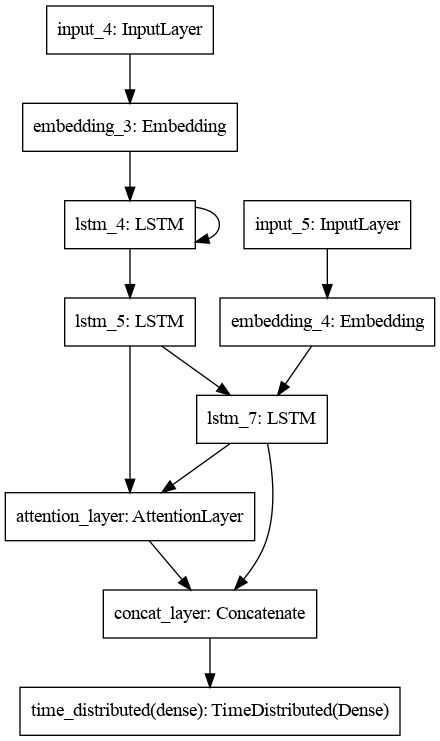

In [22]:
plot_model(model)

In [23]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer ="rmsprop")
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1)
checkpoint = ModelCheckpoint("./temp/model_best.h5", save_best_only= True)

In [26]:
model.fit([],
          validation_split=.25 ,epochs=128, callbacks=[es, checkpoint])

Epoch 1/128


ValueError: Creating variables on a non-first call to a function decorated with tf.function.